# RSSI Tools
### Educational open source tool to measure fading and shadowing of channels through RSSI
---

In [1]:
from /gui/serialModule import SerialClass
import pandas as pd
import numpy as np
from scipy.stats import norm, nakagami
from scipy.special import gamma
import matplotlib.pyplot as plt
%matplotlib inline

---

## Conexão com rádio e experimento

In [8]:
ser = SerialClass()

List of all ports connected to the PC

In [9]:
ser.list_ports()

['COM3']

Change PORT in COM_PORT to the ESP port listed

In [10]:
COM_PORT = "COM3"

In [11]:
ser.connect(COM_PORT)

Checks connection with the ESP

In [12]:
if ser.handshake():
    print("Connected to radio!")
else:
    print("Connection Failed!")

Connected


Define amount of sample of the experiment

In [13]:
samples = 3000
sample_rate = 200
distance = 3

In [14]:
i = 0 
rssi_list = []
while i < samples:
    rssi_list.append(ser.readSerial())
    i += 1
    if (i % 100) == 0:
        print(f"{i} samples")
print("Experiment finished!")

100 samples
200 samples
300 samples
400 samples
500 samples
600 samples
700 samples
800 samples
900 samples
1000 samples
1100 samples
1200 samples
1300 samples
1400 samples
1500 samples
1600 samples
1700 samples
1800 samples
1900 samples
2000 samples
2100 samples
2200 samples
2300 samples
2400 samples
2500 samples
2600 samples
2700 samples
2800 samples
2900 samples
3000 samples
Experiment finished!


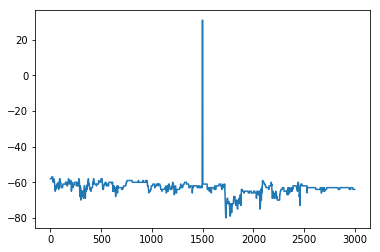

In [15]:
plt.plot(rssi_list)

In [16]:
ser.disconnect()

---

## Saving RSSI samples in a file and plotting

In [17]:
filename = f"data/{samples}s_{sample_rate}ms_{distance}m"

In [18]:
with open(filename + '.txt', 'w') as f:
    for rssi in rssi_list:
        f.write(str(rssi)+"\n")

In [19]:
df = pd.read_csv(f'data/{samples}s_{sample_rate}ms_{distance}m' + '.txt',sep='\n',names=['rssi'])

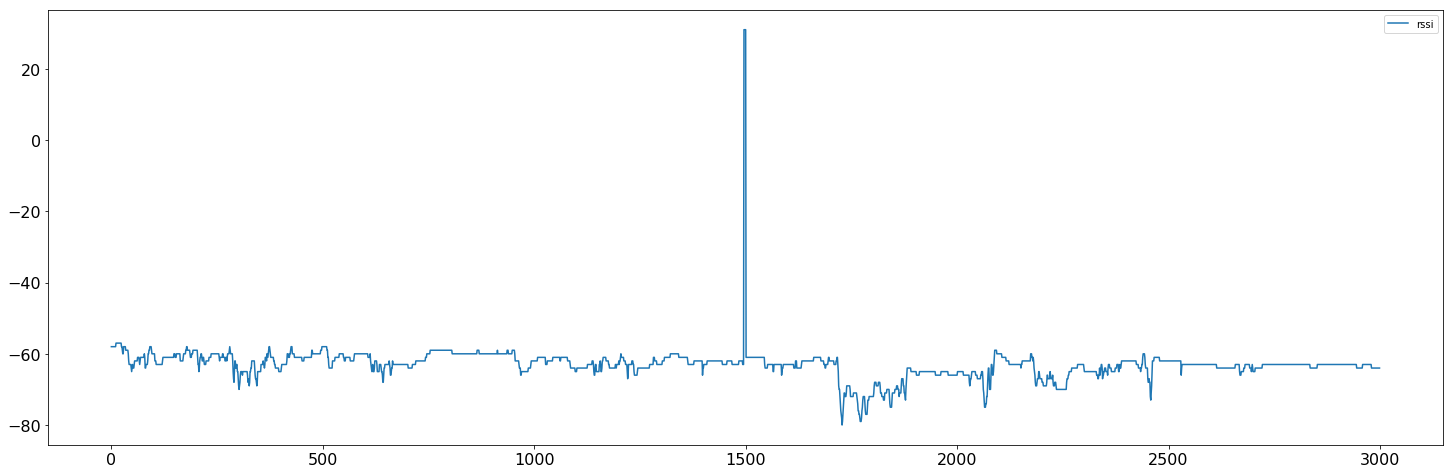

In [20]:
plot = df.plot(figsize=(25,8),fontsize=16)
fig = plot.get_figure()

In [21]:
fig.savefig(filename + '.png', bbox_inches='tight',dpi=300)

---

In [22]:
def nakagami_m(h,m):
    return (2*(m**m)*h**(2*m-1)*np.exp(-m*h**2))/gamma(m)

def fit(data):
    Pr = 10**(data/10)
    h = np.sqrt(Pr/np.mean(Pr))
    paramh = nakagami.fit(h)
    x = np.linspace(0,3,1000)
    fig, ax = plt.subplots(sharey=False)
    ax.plot(x, nakagami.pdf(x,nu=paramh[0],loc=paramh[1],scale=paramh[2]))
    ax.set_ylabel('Nakagami')
    ax2 = ax.twinx()
    h.plot(kind='hist', ax=ax2, color='g')
    fig.savefig(filename + '_dist' +'.png', bbox_inches='tight',dpi=300)
    pass

---

## Distribuição do Fading

c:\users\koba\appdata\local\programs\python\python36\lib\site-packages\scipy\stats\_continuous_distns.py:4502: RuntimeWarning: divide by zero encountered in power
  return 2*nu**nu/sc.gamma(nu)*(x**(2*nu-1.0))*np.exp(-nu*x*x)


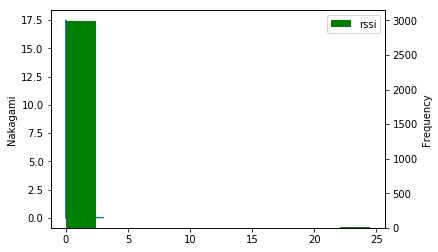

In [23]:
fit(df)

In [24]:
df.rssi.unique()

array([-58, -57, -59, -60, -62, -63, -64, -65, -61, -67, -68, -69, -70,
       -66,  31, -72, -74, -76, -77, -78, -80, -79, -75, -73, -71],
      dtype=int64)

In [25]:
df = df[df.rssi < -35]

In [26]:
df.rssi.unique()

array([-58, -57, -59, -60, -62, -63, -64, -65, -61, -67, -68, -69, -70,
       -66, -72, -74, -76, -77, -78, -80, -79, -75, -73, -71], dtype=int64)

c:\users\koba\appdata\local\programs\python\python36\lib\site-packages\scipy\stats\_continuous_distns.py:4502: RuntimeWarning: overflow encountered in double_scalars
  return 2*nu**nu/sc.gamma(nu)*(x**(2*nu-1.0))*np.exp(-nu*x*x)


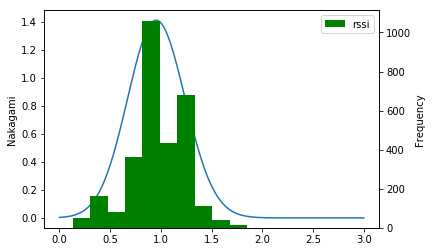

In [27]:
fit(df)